In [1]:
#Read and Plot Results
#Number of Hash Tables [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120] 
#Bucket Length [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 4, 6, 8, 10, 
#               12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
#Number of Neighbors = [1, 3, 5, 7, 15, 21, 25]
#numOfTest = 1000 

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import statistics

In [3]:
import os
import glob
os.chdir("LSH_Results2")

In [4]:
#Use glob to match the pattern ‘csv’
extension='csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [5]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv("all_results2.csv", index=False, encoding='utf-8-sig')

/Users/rsong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [6]:
#Delete previous file
# %%time
data = pd.read_csv('all_results2.csv')

In [7]:
data = data[['BucketLength', 'NumHashTables', 'M1', 'M3', 'M5', 'M7', 'M15', 'M21', 'M25', 
                 'W1', 'W3', 'W5', 'W7', 'W15', 'W21', 'W25']]

In [8]:
data.shape
#shoude be (380,16)

(380, 16)

In [9]:
data = data.sort_values(by=['BucketLength','NumHashTables'], ascending=True)

In [10]:
data.head(380)

,BucketLength,NumHashTables,M1,M3,M5,M7,M15,M21,M25,W1,W3,W5,W7,W15,W21,W25
129,0.2,1,0.506,0.503,0.508,0.505,0.478,0.471,0.464,0.506,0.503,0.507,0.504,0.481,0.474,0.463
130,0.2,10,0.519,0.527,0.529,0.521,0.505,0.489,0.488,0.519,0.527,0.532,0.523,0.505,0.494,0.493
131,0.2,20,0.507,0.519,0.525,0.514,0.506,0.496,0.493,0.507,0.520,0.528,0.522,0.513,0.506,0.501
132,0.2,30,0.507,0.516,0.511,0.514,0.494,0.483,0.486,0.507,0.517,0.516,0.517,0.496,0.487,0.488
39,0.2,40,0.497,0.499,0.505,0.507,0.500,0.496,0.490,0.497,0.501,0.507,0.512,0.506,0.498,0.494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,120.0,80,0.516,0.523,0.516,0.509,0.494,0.479,0.473,0.516,0.522,0.517,0.511,0.499,0.482,0.472
35,120.0,90,0.499,0.502,0.497,0.496,0.494,0.486,0.483,0.499,0.504,0.500,0.505,0.495,0.492,0.488
36,120.0,100,0.497,0.508,0.504,0.495,0.482,0.480,0.467,0.497,0.508,0.509,0.497,0.481,0.479,0.472
37,120.0,110,0.487,0.494,0.499,0.495,0.467,0.465,0.457,0.487,0.495,0.501,0.497,0.472,0.464,0.459


In [11]:
BucketLength = list(data['BucketLength'])
NumHushTables = list(data['NumHashTables'])
M1 = list(data['M1'])
M3 = list(data['M3'])
M5 = list(data['M5'])
M7 = list(data['M7'])
M15 = list(data['M15'])
M21 = list(data['M21'])
M25 = list(data['M25'])
W1 = list(data['W1'])
W3 = list(data['W3'])
W5 = list(data['W5'])
W7 = list(data['W7'])
W15 = list(data['W15'])
W21 = list(data['W21'])
W25 = list(data['W25'])

# print(BucketLength)
# print(NumHushTables)
# print(M15)

In [12]:
mAvg = []
for i in range(380):
    majorityAvg = (M1[i] + M3[i] + M5[i] + M7[i] + M15[i] + M21[i] + M25[i])/7
    #print(BucketLength[i], NumHushTables[i], majorityAvg)
    mAvg.append(majorityAvg)

In [13]:
#mAvg
#len(mAvg)

In [14]:
data['mAvg'] = mAvg

In [15]:
data.head(380)

,BucketLength,NumHashTables,M1,M3,M5,M7,M15,M21,M25,W1,W3,W5,W7,W15,W21,W25,mAvg
129,0.2,1,0.506,0.503,0.508,0.505,0.478,0.471,0.464,0.506,0.503,0.507,0.504,0.481,0.474,0.463,0.490714
130,0.2,10,0.519,0.527,0.529,0.521,0.505,0.489,0.488,0.519,0.527,0.532,0.523,0.505,0.494,0.493,0.511143
131,0.2,20,0.507,0.519,0.525,0.514,0.506,0.496,0.493,0.507,0.520,0.528,0.522,0.513,0.506,0.501,0.508571
132,0.2,30,0.507,0.516,0.511,0.514,0.494,0.483,0.486,0.507,0.517,0.516,0.517,0.496,0.487,0.488,0.501571
39,0.2,40,0.497,0.499,0.505,0.507,0.500,0.496,0.490,0.497,0.501,0.507,0.512,0.506,0.498,0.494,0.499143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,120.0,80,0.516,0.523,0.516,0.509,0.494,0.479,0.473,0.516,0.522,0.517,0.511,0.499,0.482,0.472,0.501429
35,120.0,90,0.499,0.502,0.497,0.496,0.494,0.486,0.483,0.499,0.504,0.500,0.505,0.495,0.492,0.488,0.493857
36,120.0,100,0.497,0.508,0.504,0.495,0.482,0.480,0.467,0.497,0.508,0.509,0.497,0.481,0.479,0.472,0.490429
37,120.0,110,0.487,0.494,0.499,0.495,0.467,0.465,0.457,0.487,0.495,0.501,0.497,0.472,0.464,0.459,0.480571


In [16]:
wAvg = []
for i in range(380):
    weightedAvg = (W1[i] + W3[i] + W5[i] + W7[i] + W15[i] + W21[i] + W25[i])/7
   # print(BucketLength[i], NumHushTables[i], weightedAvg)
    wAvg.append(weightedAvg)

In [17]:
# wAvg
# len(mAvg)

In [18]:
data['wAvg'] = wAvg

In [19]:
data.head(380)

,BucketLength,NumHashTables,M1,M3,M5,M7,M15,M21,M25,W1,W3,W5,W7,W15,W21,W25,mAvg,wAvg
129,0.2,1,0.506,0.503,0.508,0.505,0.478,0.471,0.464,0.506,0.503,0.507,0.504,0.481,0.474,0.463,0.490714,0.491143
130,0.2,10,0.519,0.527,0.529,0.521,0.505,0.489,0.488,0.519,0.527,0.532,0.523,0.505,0.494,0.493,0.511143,0.513286
131,0.2,20,0.507,0.519,0.525,0.514,0.506,0.496,0.493,0.507,0.520,0.528,0.522,0.513,0.506,0.501,0.508571,0.513857
132,0.2,30,0.507,0.516,0.511,0.514,0.494,0.483,0.486,0.507,0.517,0.516,0.517,0.496,0.487,0.488,0.501571,0.504000
39,0.2,40,0.497,0.499,0.505,0.507,0.500,0.496,0.490,0.497,0.501,0.507,0.512,0.506,0.498,0.494,0.499143,0.502143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,120.0,80,0.516,0.523,0.516,0.509,0.494,0.479,0.473,0.516,0.522,0.517,0.511,0.499,0.482,0.472,0.501429,0.502714
35,120.0,90,0.499,0.502,0.497,0.496,0.494,0.486,0.483,0.499,0.504,0.500,0.505,0.495,0.492,0.488,0.493857,0.497571
36,120.0,100,0.497,0.508,0.504,0.495,0.482,0.480,0.467,0.497,0.508,0.509,0.497,0.481,0.479,0.472,0.490429,0.491857
37,120.0,110,0.487,0.494,0.499,0.495,0.467,0.465,0.457,0.487,0.495,0.501,0.497,0.472,0.464,0.459,0.480571,0.482143


In [20]:
#Top Majority Avg with parameters
data.sort_values(by='mAvg', ascending=False).head(10)

,BucketLength,NumHashTables,M1,M3,M5,M7,M15,M21,M25,W1,W3,W5,W7,W15,W21,W25,mAvg,wAvg
74,0.2,120,0.530,0.538,0.549,0.554,0.532,0.519,0.520,0.530,0.539,0.552,0.553,0.534,0.520,0.519,0.534571,0.535286
307,10.0,50,0.526,0.531,0.543,0.542,0.534,0.526,0.521,0.526,0.532,0.547,0.544,0.538,0.532,0.526,0.531857,0.535000
128,2.0,120,0.537,0.540,0.542,0.538,0.519,0.518,0.514,0.537,0.540,0.544,0.540,0.524,0.519,0.515,0.529714,0.531286
54,1.2,40,0.540,0.544,0.536,0.526,0.528,0.515,0.514,0.540,0.544,0.539,0.528,0.531,0.514,0.517,0.529000,0.530429
371,20.0,40,0.523,0.537,0.536,0.547,0.522,0.502,0.502,0.523,0.537,0.535,0.545,0.526,0.508,0.507,0.524143,0.525857
297,8.0,80,0.532,0.538,0.525,0.529,0.525,0.511,0.508,0.532,0.538,0.529,0.538,0.533,0.516,0.510,0.524000,0.528000
109,1.4,110,0.522,0.535,0.544,0.539,0.519,0.505,0.501,0.522,0.535,0.545,0.542,0.523,0.512,0.503,0.523571,0.526000
245,60.0,30,0.539,0.543,0.536,0.529,0.518,0.504,0.496,0.539,0.544,0.536,0.533,0.520,0.512,0.503,0.523571,0.526714
322,12.0,70,0.535,0.539,0.541,0.539,0.517,0.501,0.487,0.535,0.539,0.545,0.540,0.516,0.502,0.488,0.522714,0.523571
189,90.0,1,0.539,0.545,0.544,0.531,0.506,0.501,0.493,0.539,0.546,0.545,0.532,0.514,0.510,0.499,0.522714,0.526429


In [21]:
#Top Weighted Avg with parameters
data.sort_values(by='wAvg', ascending=False).head(10)

,BucketLength,NumHashTables,M1,M3,M5,M7,M15,M21,M25,W1,W3,W5,W7,W15,W21,W25,mAvg,wAvg
74,0.2,120,0.530,0.538,0.549,0.554,0.532,0.519,0.520,0.530,0.539,0.552,0.553,0.534,0.520,0.519,0.534571,0.535286
307,10.0,50,0.526,0.531,0.543,0.542,0.534,0.526,0.521,0.526,0.532,0.547,0.544,0.538,0.532,0.526,0.531857,0.535000
128,2.0,120,0.537,0.540,0.542,0.538,0.519,0.518,0.514,0.537,0.540,0.544,0.540,0.524,0.519,0.515,0.529714,0.531286
54,1.2,40,0.540,0.544,0.536,0.526,0.528,0.515,0.514,0.540,0.544,0.539,0.528,0.531,0.514,0.517,0.529000,0.530429
297,8.0,80,0.532,0.538,0.525,0.529,0.525,0.511,0.508,0.532,0.538,0.529,0.538,0.533,0.516,0.510,0.524000,0.528000
245,60.0,30,0.539,0.543,0.536,0.529,0.518,0.504,0.496,0.539,0.544,0.536,0.533,0.520,0.512,0.503,0.523571,0.526714
189,90.0,1,0.539,0.545,0.544,0.531,0.506,0.501,0.493,0.539,0.546,0.545,0.532,0.514,0.510,0.499,0.522714,0.526429
109,1.4,110,0.522,0.535,0.544,0.539,0.519,0.505,0.501,0.522,0.535,0.545,0.542,0.523,0.512,0.503,0.523571,0.526000
371,20.0,40,0.523,0.537,0.536,0.547,0.522,0.502,0.502,0.523,0.537,0.535,0.545,0.526,0.508,0.507,0.524143,0.525857
322,12.0,70,0.535,0.539,0.541,0.539,0.517,0.501,0.487,0.535,0.539,0.545,0.540,0.516,0.502,0.488,0.522714,0.523571


Text(0.5, 0.92, 'Majority Avg, Number of Neighbors = 1,3,5,7,15,21,25')

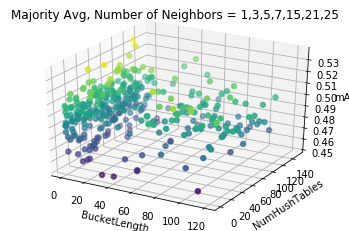

In [22]:
ax = plt.axes(projection='3d')
ax.scatter(BucketLength, NumHushTables, mAvg, c=mAvg, cmap='viridis', linewidth=2)
ax.set_xlabel('BucketLength')
ax.set_ylabel('NumHushTables')
ax.set_zlabel('mAvg')
# plt.xlim((0,20))
plt.title('Majority Avg, Number of Neighbors = 1,3,5,7,15,21,25')

Text(0.5, 0.92, 'Weighted Avg, Number of Neighbors = 1,3,5,7,15,21,25')

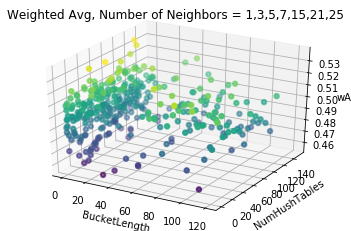

In [23]:
ax = plt.axes(projection='3d')
ax.scatter(BucketLength, NumHushTables, wAvg, c=wAvg, cmap='viridis', linewidth=2)
ax.set_xlabel('BucketLength')
ax.set_ylabel('NumHushTables')
ax.set_zlabel('wAvg')
#plt.xlim((0,20))
plt.title('Weighted Avg, Number of Neighbors = 1,3,5,7,15,21,25')

Text(0.5, 1.0, 'Majority Avg, Number of Neighbors = 1,3,5,7,15,21,25')

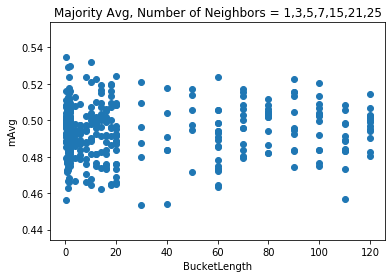

In [24]:
matplotlib.pyplot.scatter(BucketLength, mAvg)
plt.xlabel('BucketLength')
plt.ylabel('mAvg')
# plt.xlim((0,2.5))
plt.title('Majority Avg, Number of Neighbors = 1,3,5,7,15,21,25')

Text(0.5, 1.0, 'Majority Avg, Number of Neighbors = 1,3,5,7,15,21,25')

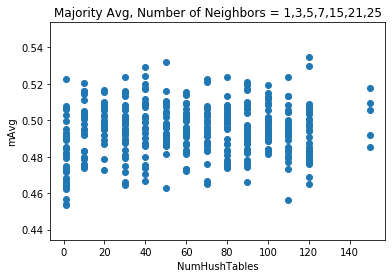

In [25]:
matplotlib.pyplot.scatter(NumHushTables, mAvg)
plt.xlabel('NumHushTables')
plt.ylabel('mAvg')
plt.title('Majority Avg, Number of Neighbors = 1,3,5,7,15,21,25')

Text(0.5, 1.0, 'Weighted Avg, Number of Neighbors = 1,3,5,7,15,21,25')

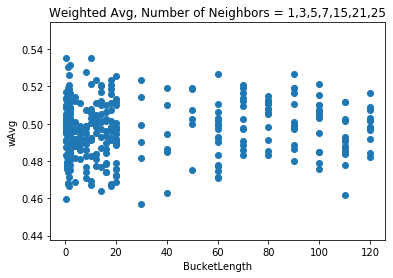

In [26]:
matplotlib.pyplot.scatter(BucketLength, wAvg)
plt.xlabel('BucketLength')
plt.ylabel('wAvg')
# plt.xlim((0,2.5))
plt.title('Weighted Avg, Number of Neighbors = 1,3,5,7,15,21,25')

Text(0.5, 1.0, 'Weighted Avg, Number of Neighbors = 1,3,5,7,15,21,25')

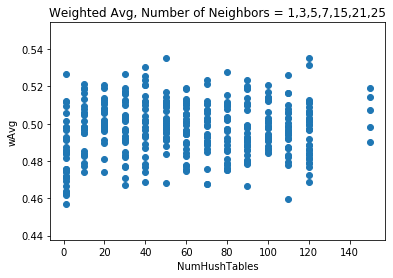

In [27]:
matplotlib.pyplot.scatter(NumHushTables, wAvg)
plt.xlabel('NumHushTables')
plt.ylabel('wAvg')
plt.title('Weighted Avg, Number of Neighbors = 1,3,5,7,15,21,25')

In [28]:
np.unique(BucketLength)
# len(np.unique(BucketLength))

array([  0.2,   0.4,   0.6,   0.8,   1. ,   1.2,   1.4,   1.6,   1.8,
         2. ,   4. ,   6. ,   8. ,  10. ,  12. ,  14. ,  16. ,  18. ,
        20. ,  30. ,  40. ,  50. ,  60. ,  70. ,  80. ,  90. , 100. ,
       110. , 120. ])

In [29]:
#Majority Avg & Weighted Avg with different BucketLength
acc_score1 = []
acc_score2 = []
for k in np.unique(BucketLength):
    res1 = []
    res2 = []
    for i in range (380):
        if data['BucketLength'][i] == k:
            #print(i, data['BucketLength'][i], data['mAvg'][i])
            res1.append(data['mAvg'][i])
            res2.append(data['wAvg'][i])
    acc_score1.append(statistics.mean(res1))
    acc_score2.append(statistics.mean(res2))
#acc_score1

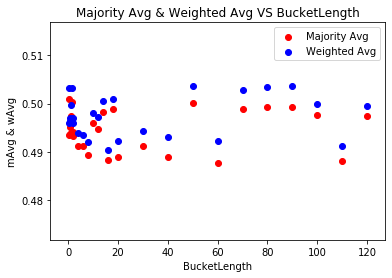

In [30]:
#Mean Majority & Weighted Avg with different BucketLength
matplotlib.pyplot.scatter(np.unique(BucketLength), acc_score1, c='red')
matplotlib.pyplot.scatter(np.unique(BucketLength), acc_score2, c='blue')
plt.xlabel('BucketLength')
plt.ylabel('mAvg & wAvg')
plt.title('Majority Avg & Weighted Avg VS BucketLength')
plt.legend(['Majority Avg', 'Weighted Avg'])
# plt.xlim((0,20))

In [31]:
#Majority Avg & Weighted Avg with different Hash Tables
acc_score3 = []
acc_score4 = []
for k in np.unique(NumHushTables):
    res3 = []
    res4 = []
    for i in range (380):
        if data['NumHashTables'][i] == k:
           # print(i, data['NumHashTables'][i], data['mAvg'][i])
            res3.append(data['mAvg'][i])
            res4.append(data['wAvg'][i])
    acc_score3.append(statistics.mean(res3))
    acc_score4.append(statistics.mean(res4))
#acc_score3

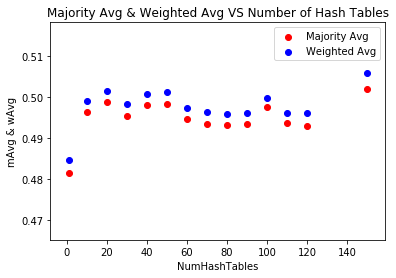

In [32]:
#Mean Majority & Weighted Avg with different Hash Tables
matplotlib.pyplot.scatter(np.unique(NumHushTables), acc_score3, c='red')
matplotlib.pyplot.scatter(np.unique(NumHushTables), acc_score4, c='blue')
plt.xlabel('NumHashTables')
plt.ylabel('mAvg & wAvg')
plt.title('Majority Avg & Weighted Avg VS Number of Hash Tables')
plt.legend(['Majority Avg', 'Weighted Avg'])

Text(0, 0.5, 'Acc')

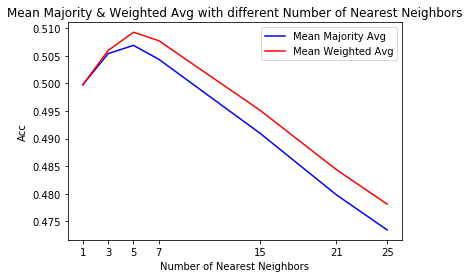

In [33]:
x = [1, 3, 5, 7, 15, 21, 25]
y1 = [statistics.mean(M1), statistics.mean(M3), statistics.mean(M5), statistics.mean(M7),
        statistics.mean(M15), statistics.mean(M21), statistics.mean(M25)]
y2 = [statistics.mean(W1), statistics.mean(W3), statistics.mean(W5), statistics.mean(W7),
        statistics.mean(W15), statistics.mean(W21), statistics.mean(W25)]
fig, ax = plt.subplots()
ax.plot(x, y1, '-b', label='Mean Majority Avg')
ax.plot(x, y2, '-r', label='Mean Weighted Avg')
plt.xticks([1,3,5,7,15,21,25])
leg = ax.legend();
plt.title('Mean Majority & Weighted Avg with different Number of Nearest Neighbors');
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Acc')